# <u>Thera Bank - Loan Purchase Modelling</u>

In [1]:
#import the necessary modules
%config IPCompleter.greedy=True
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

In [2]:
#reading data into pandas dataframe
data = pd.read_excel("Thera Bank_Personal_Loan_Modelling-dataset-1_share.xlsx",sheet_name="Bank_Personal_Loan_Modelling")

In [3]:
#print top 10 records
data.head(10)

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4.0,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2.0,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1.0,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3.0,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1.0,8.9,3,0,1,0,0,0,0


In [4]:
# how many data-points and features?
data.shape

(5000, 14)

In [5]:
# What are the column names in our dataset?
print (data.columns)

Index(['ID', 'Age (in years)', 'Experience (in years)', 'Income (in K/month)',
       'ZIP Code', 'Family members', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')


In [6]:
#check if there are missing values in our data
data.isnull().sum()

ID                        0
Age (in years)            0
Experience (in years)     0
Income (in K/month)       0
ZIP Code                  0
Family members           18
CCAvg                     0
Education                 0
Mortgage                  0
Personal Loan             0
Securities Account        0
CD Account                0
Online                    0
CreditCard                0
dtype: int64

In [3]:
#using imputation to take care of the missing values
from sklearn.preprocessing import Imputer
#I will use the most frequent strategy for imputation as there are only 4-5 possible values
imputer = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0) 
imputer = imputer.fit(data["Family members"].values.reshape(-1, 1))
data["Family members"] = imputer.transform(data["Family members"].values.reshape(-1, 1))

C:\Users\prateeksood\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## <u>Exploratory Data Analysis: Univariate Analysis</u>

#### <u>Note</u>: Since We have less no of features, so I could perform univariate analysis for all the features

In [22]:
#Analysing the Age (in years) feature
data["Age (in years)"].describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age (in years), dtype: float64

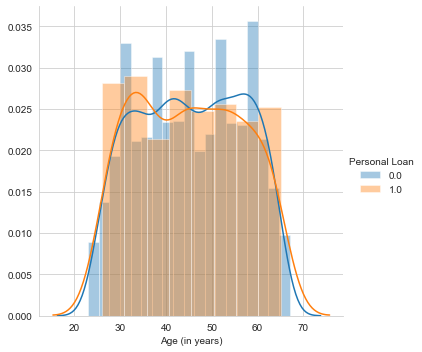

In [34]:
#Visualizing the Age (in years) feature with with hue set to people who took loan or not
sns.FacetGrid(data, hue='Personal Loan', size=5) \
   .map(sns.distplot, "Age (in years)") \
   .add_legend();
plt.show();

#### <u>Observation</u>: We can observe that age feature is not very good in identifying people who took loan, since the distribution of age is overlapping for both types of people

In [24]:
#Analysing the Experience (in years) feature
data["Experience (in years)"].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience (in years), dtype: float64

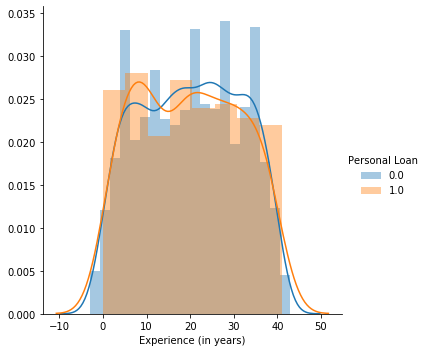

In [25]:
#Visualizing the Experience (in years) feature with with hue set to people who took loan or not
sns.FacetGrid(data, hue='Personal Loan', size=5) \
   .map(sns.distplot, "Experience (in years)") \
   .add_legend();
plt.show();

#### <u>Observation</u>: We can observe that age feature is not very good in identifying people who took loan, since the distribution of age is overlapping for both types of people

In [35]:
#Analysing the Income (in K/month) feature
data["Income (in K/month)"].describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income (in K/month), dtype: float64

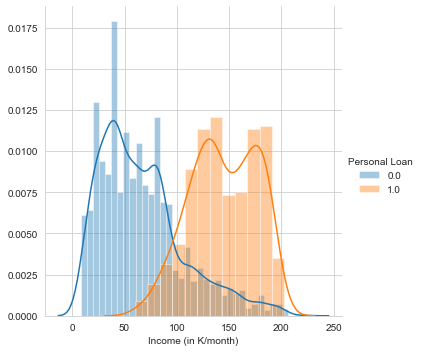

In [33]:
#Visualizing the Income (in K/month) feature with with hue set to people who took loan or not
sns.FacetGrid(data, hue='Personal Loan', size=5) \
   .map(sns.distplot, "Income (in K/month)") \
   .add_legend();
plt.show();

#### <u>Observation</u>: We can observe that Income (in K/month) feature seems good to separate people who took loan or not. Even though we can see some overlap, but otherwise this feature separates the distribution of people who took loan and who didn't. We can see that people with higher incomes have more chances of taking a loan, whereas people with low income have low chances of taking a loan

In [4]:
#Analysing the Family members feature
data["Family members"].describe()

count    5000.000000
mean        2.392200
std         1.148148
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Family members, dtype: float64

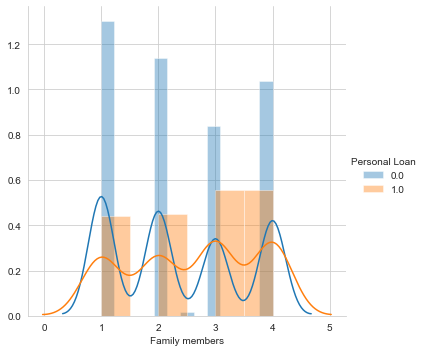

In [36]:
#Visualizing the Family members feature with with hue set to people who took loan or not
sns.FacetGrid(data, hue='Personal Loan', size=5) \
   .map(sns.distplot, "Family members") \
   .add_legend();
plt.show();

#### <u>Observation</u>: Family members feature again doesn't seem to be doing a very good job at separating poeple who took loan and those who didn't. But we can observe that  people who didn't take loan are more distributed with 1 or 2 family members as compared to 3 or 4 family members. Whereas people who took loan evenly distributed for all the brackets

In [5]:
#Analysing the CCAvg feature
data["CCAvg"].describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

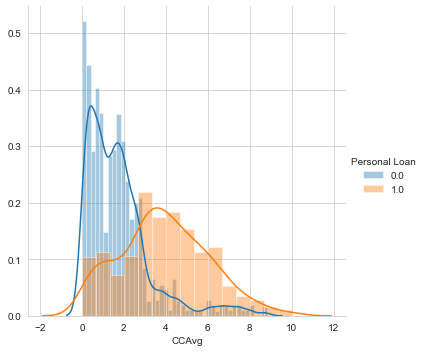

In [37]:
#Visualizing the CCAvg feature with with hue set to people who took loan or not
sns.FacetGrid(data, hue='Personal Loan', size=5) \
   .map(sns.distplot, "CCAvg") \
   .add_legend();
plt.show();

#### <u>Observation</u>: We can observe that CCAvg feature is doing a better job to separate people who took loan or not, as compared to other features. Even though we can see overlap, but otherwise this feature separates the distribution of people who took loan and who didn't to some extent. We can see that people with lower CC Avg have a lower chance of taking a loan, whereas people with high CC Avg have a somewhat higher chances of taking a loan. We can also observe that lot's of people with low CC avg can also be seen taking a loan and similarly people with higher CC avg can also be seen that have not taken a loan (hence the overlap)

In [6]:
#Analysing the Education feature
data["Education"].describe()

count    5000.000000
mean        1.881000
std         0.839869
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Education, dtype: float64

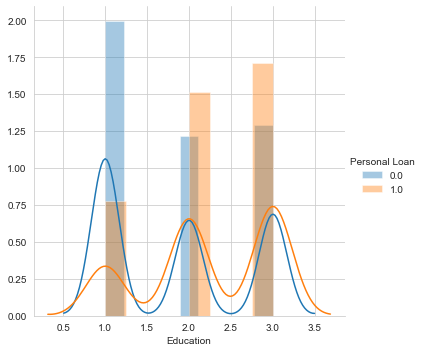

In [38]:
#Visualizing the Education feature with with hue set to people who took loan or not
sns.FacetGrid(data, hue='Personal Loan', size=5) \
   .map(sns.distplot, "Education") \
   .add_legend();
plt.show();

#### <u>Observation</u>: Education  feature also doesn't seem to be doing a very good job at separating people who took loan and those who didn't. But we can observe that more people who didn't take loan are distributed with 1 year education as compared to higher number of education. For people who took loan, the oppsite can be observed, where there are less people distributed with 1 year education as compared to people with higher education. Also an interesting thing to note is that people who took loan are a lot lesser than people who didn't, but we can see that for 2 or more years of education, there is comparable distribution of both types of people. This means that in general, for people with higher edcuation there are more chances of them taking a loan.

In [7]:
#Analysing the Mortgage feature
data["Mortgage"].describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

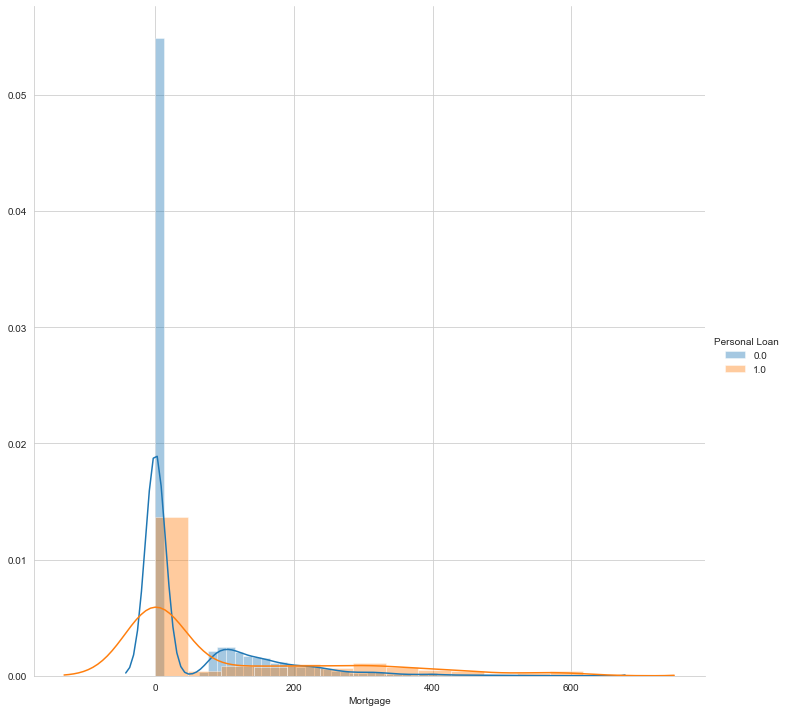

In [40]:
#Visualizing the Education feature with with hue set to people who took loan or not
sns.FacetGrid(data, hue='Personal Loan', size=10) \
   .map(sns.distplot, "Mortgage") \
   .add_legend();
plt.show();

#### <u>Observation</u>: By visualizing Mortage  feature,  we can see that most of the people do not have a mortgage and so both types of people are largely distributed in the zone of 0 mortgage. But we can observe that as the mortgage increases, the tendency of a person to take a loan also increases. So for higher mortgage amount, this features could prove useful to separate the data, but fails otherwise.

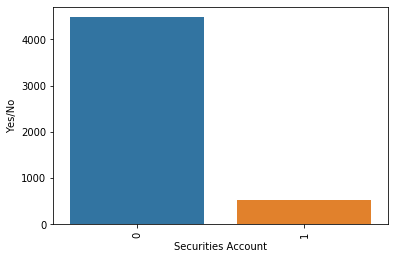

In [20]:
#Analysing the Securities Account feature using histogram since it is a binary feature
sns.countplot(x='Securities Account', data=data)
plt.title('')
plt.ylabel('Yes/No')
plt.xlabel('Securities Account')
plt.xticks(rotation = 90)
plt.show();

#### <u>Observation</u>: We could observe that most of the people do not have a securities account so this feature might not be very useful due to very high imbalance

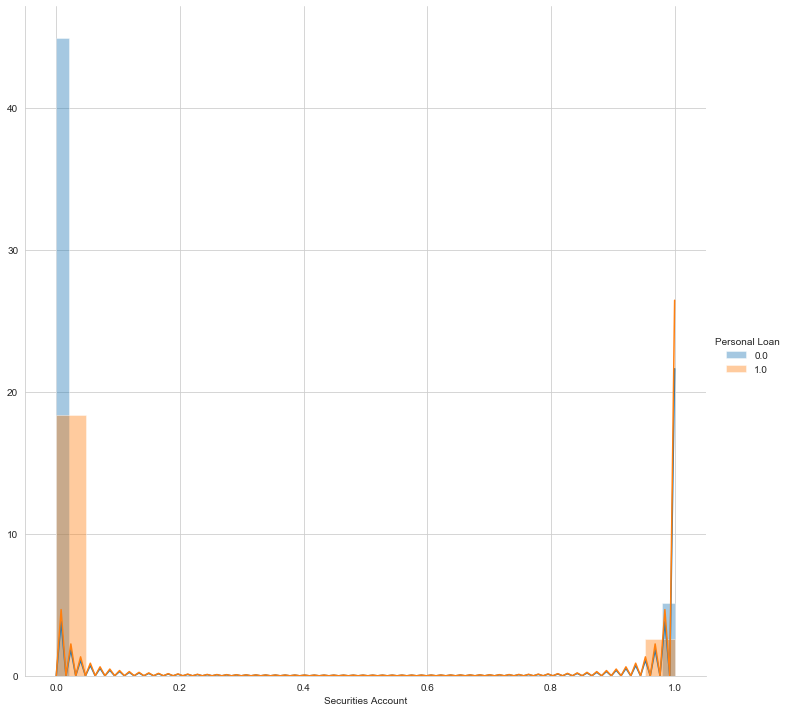

In [45]:
#Visualizing the Securities Account feature with with hue set to people who took loan or not
sns.FacetGrid(data, hue='Personal Loan', size=10) \
   .map(sns.distplot, "Securities Account") \
   .add_legend();
plt.show();

#### <u>Observation</u>: Since both types of people are distributed for both the possible values, hence this feature does not seem to be useful one

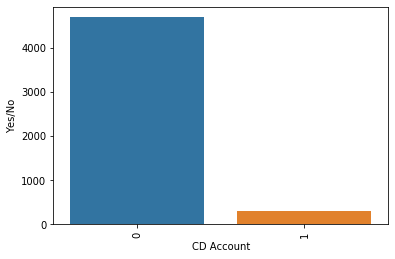

In [21]:
#Analysing the CD Account feature using histogram since it is a binary feature
sns.countplot(x='CD Account', data=data)
plt.title('')
plt.ylabel('Yes/No')
plt.xlabel('CD Account')
plt.xticks(rotation = 90)
plt.show();

#### <u>Observation</u>: We could observe that most of the people do not have a CD account so this feature might not be very useful due to very high imbalance similar to Securties Account feature

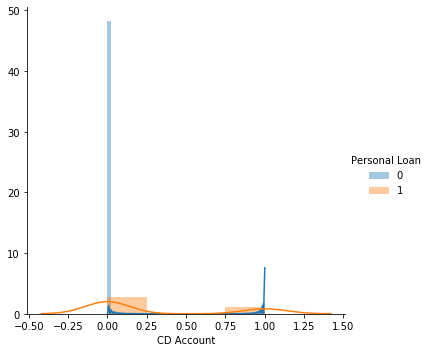

In [45]:
#Visualizing the Securities Account feature with with hue set to people who took loan or not
sns.FacetGrid(data, hue='Personal Loan', height=5) \
   .map(sns.distplot, "CD Account") \
   .add_legend();
plt.show();

#### <u>Observation</u>: Similar to Securities Account feature,  both types of people are distributed for both the possible values, hence this feature does not seem to be useful one

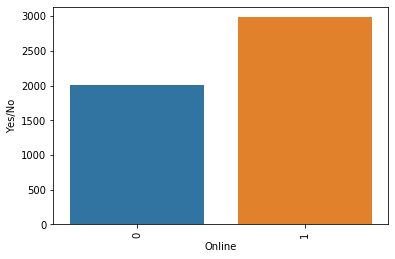

In [23]:
#Analysing the Online feature using histogram since it is a binary feature
sns.countplot(x='Online', data=data)
plt.title('')
plt.ylabel('Yes/No')
plt.xlabel('Online')
plt.xticks(rotation = 90)
plt.show();

#### <u>Observation</u>: Here the data seems balanced w.r.t. Online feature and we could see that considerable amount of users exist for both the possible values of Online feature

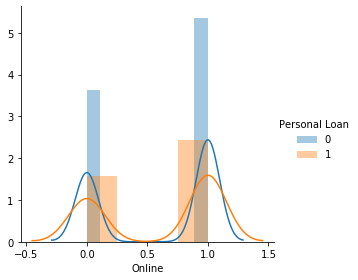

In [26]:
sns.FacetGrid(data, hue='Personal Loan', size=4) \
   .map(sns.distplot, "Online") \
   .add_legend();
plt.show();

#### <u>Observation</u>: Again both types of people are distributed for both the possible values, hence this feature does not seem to be useful one as observerd with previous binary features

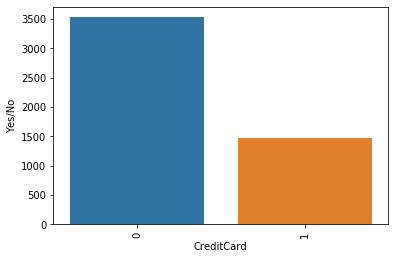

In [27]:
#Analysing the CreditCard feature using histogram since it is a binary feature
sns.countplot(x='CreditCard', data=data)
plt.title('')
plt.ylabel('Yes/No')
plt.xlabel('CreditCard')
plt.xticks(rotation = 90)
plt.show();

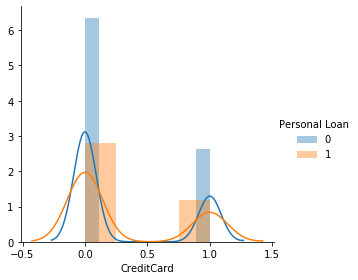

In [28]:
#Visualizing the CreditCard feature with with hue set to people who took loan or not
sns.FacetGrid(data, hue='Personal Loan', size=4) \
   .map(sns.distplot, "CreditCard") \
   .add_legend();
plt.show();

#### <u>Observation</u>: Again both types of people are distributed for both the possible values, hence this feature does not seem to be useful one as observerd with previous binary features

<h2><u>Overall Observation from Uni-variate EDA: </u></h2>

<b>Most of the features do not seem very useful in separating the people who took loan and people who did. Binary features seem to be even lesser useful than numerical features in my analysis. The two most important features for separating data seems to be Income (in K/month) and CCAvg features. Other features that might be useful are family members, Education and mortgage</b>

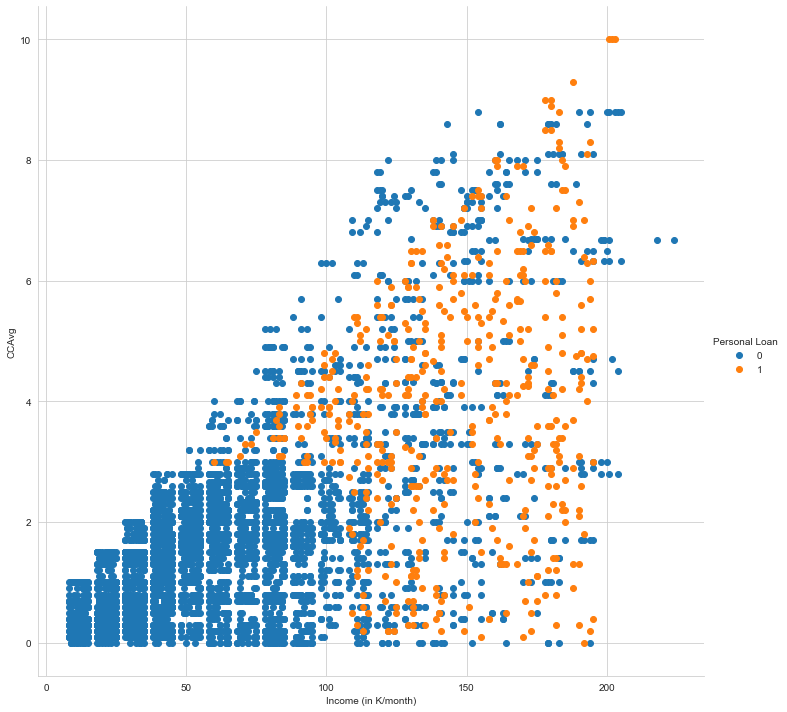

In [86]:
# since Income (in K/month) and CCAvg seem to be the most important features, so let's plot a scatter plot with these features
sns.set_style("whitegrid");
sns.FacetGrid(data,hue='Personal Loan', size=10) \
   .map(plt.scatter, "Income (in K/month)", "CCAvg") \
   .add_legend();
plt.show();

#### <u>Observation</u>: We can observe that people who took loan either have a higher CCAvg or have a higher Income or both. Hence combination of these two features seem useful for our problem

### <u>Visualizing whole data in 2D using T-SNE</u>

#### <u>Note:</u> I am dropping the features ID and ZIP Code as they do not seem to provide any value to data

In [4]:
data = data.drop(['ID','ZIP Code'], axis=1)

In [5]:
#First stardardize the data so that it can be used by T-SNE for visualization
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data)
print(data_std.shape)

(5000, 12)


In [9]:
#Method to visualize data using T-SNE
import seaborn as sns
def VisualizeTsne(tsne_data, loan_Accepted):
    tsne_data = np.vstack((tsne_data.T,loan_Accepted)).T
    tsne_df=pd.DataFrame(tsne_data, columns=('Dim1', 'Dim2', 'Loan_Accepted'))
    sns.FacetGrid(tsne_df, hue='Loan_Accepted', height=6).map(plt.scatter,'Dim1','Dim2').add_legend()
    plt.title('T-sne on data with color hue set to customers that accepted loan')
    plt.show()

In [8]:
#train tsne with default parameter values
from sklearn.manifold import TSNE as tsne
model = tsne(n_components=2)
tsne_data = model.fit_transform(data_std)
print("tsne Model trained")

tsne Model trained


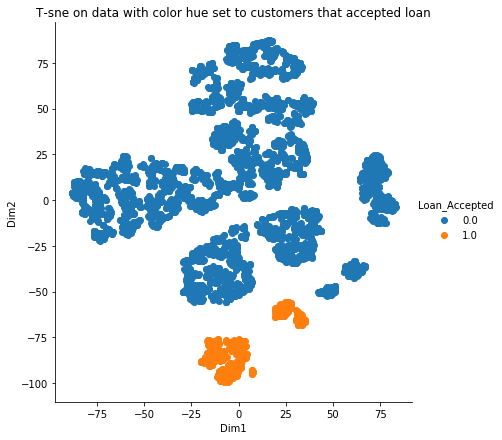

In [10]:
#visualizing the results of tsne
loan_accepted =  data["Personal Loan"]
VisualizeTsne(tsne_data, loan_accepted)

#### <u>Observation</u>: We can observe that our data is well clustered. The people who took loan, shown is orange, could be clearly distinguished in separate clusters

# <u>Clustering</u>

In [6]:
#I will now perform K-Means clustering for data segmentation
from sklearn.cluster import KMeans

In [12]:
from tqdm import tqdm
# defining a method to tune hyper-parameter (no of clusters) for K-Means clustering
def TuneHyperParameter(KValues, X, init,n_init, max_iter):
    """Gets the inertia values for all correponding K valuess and plot K values againt Inertia values"""
    inertias = []
    for k in tqdm(KValues):
        kmeans = KMeans(n_clusters=k, init=init, n_init=n_init, max_iter=max_iter, n_jobs=-1)
        kmeans.fit(X)
        inertia = kmeans.inertia_
        inertias.append(inertia)
    #Now plot K vs inertia plot
    plt.plot(KValues, inertias)
    plt.xlabel('Number of Clusters K')
    plt.ylabel('Inertia')
    plt.title('Inertia vs K plot')
    plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.22it/s]


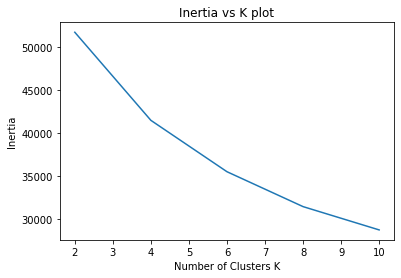

In [13]:
# performing hyper-parameter tuning for K-Means
KValues = np.arange(2,11,2)
TuneHyperParameter(KValues, data_std,'k-means++',5, 300)

#### <u>Observation</u>: From the plot above (elbow method) and by looking at T-SNE results which were shown previously, I feel that number of clusters 6 seems to be an optimal value for K

In [7]:
#applying K means on best K value
bestKValue = 6
kmeans = KMeans(n_clusters=bestKValue, init='k-means++', n_init=5, max_iter=300, n_jobs=-1)
kmeans.fit(data_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=5, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
#Let's add one more column to data that will contain the cluster label for the corresponding data point
data['Cluster'] = kmeans.labels_

In [9]:
#Serializing the data with cluster label as a new feature
with open("data_with_cluster.pkl","wb") as f:
    pickle.dump(data,f)

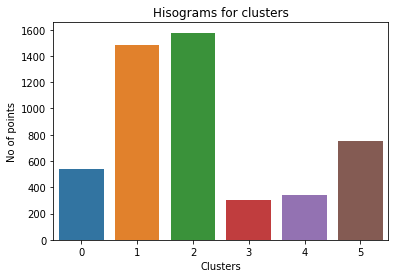

In [20]:
# observing the distribution of data points in clusters using histogram
sns.countplot(x='Cluster', data=data)
plt.title('Hisograms for clusters')
plt.ylabel('No of points')
plt.xlabel('Clusters')
plt.show()

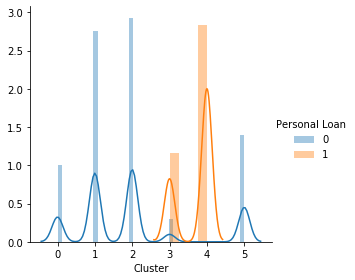

In [21]:
#Visualizing the clusters with with hue set to people who took loan or not
sns.FacetGrid(data, hue='Personal Loan', height=4) \
   .map(sns.distplot, "Cluster") \
   .add_legend();
plt.show();

#### <u>Observation</u>: It can be seen that people who took loan are in distributed in clusters 3 and 4

### Visualizing and analysing clusters w.r.t Income Feature

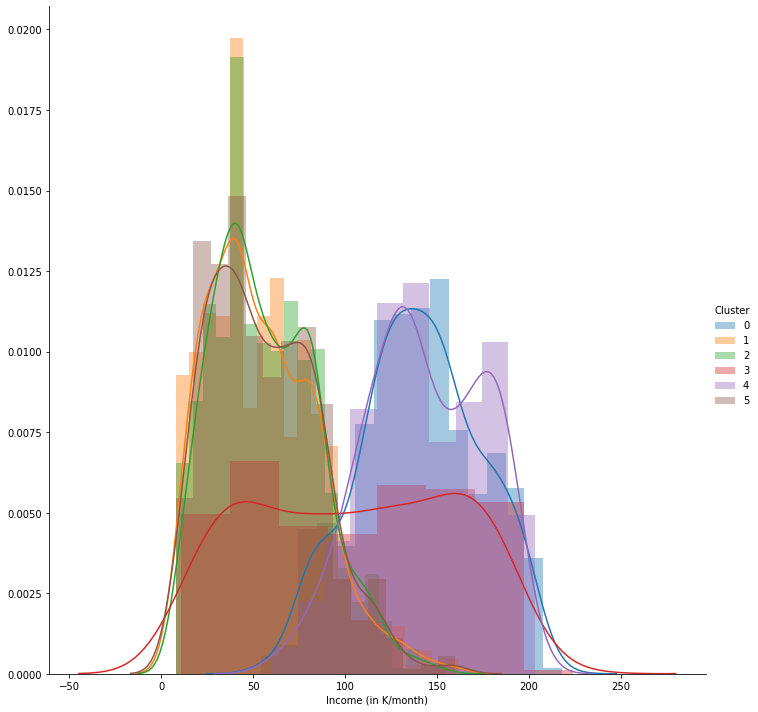

In [22]:
#Visualizing the Income feature with with hue set to clusters. This way we can see the relation between clusters and this feature
sns.FacetGrid(data, hue='Cluster', size=10) \
   .map(sns.distplot, "Income (in K/month)") \
   .add_legend();
plt.show();

#### <u>Observation</u>: We can observe that people in cluster 1,2 and 5 are mostly distributes at lower income levels. People in cluster 0 and 4 moslty belong to higher income groups. Whereas poeple in cluster 3 are distributed throughout the data and they can be found at all income levels

In [24]:
#Let us analyse some of the clusters numerically
# I will analyse the following four clusters
data_cluster_0 = data[data["Cluster"] == 0]
data_cluster_4 = data[data["Cluster"] == 4]
data_cluster_3 = data[data["Cluster"] == 3]
data_cluster_2 = data[data["Cluster"] == 2]

In [25]:
#the stats for orignal data for Income Feature
data["Income (in K/month)"].describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income (in K/month), dtype: float64

In [27]:
#the stats for Cluster 0 data for Income Feature
data_cluster_0["Income (in K/month)"].describe()

count    542.000000
mean     140.392989
std       32.896221
min       54.000000
25%      119.000000
50%      140.000000
75%      163.000000
max      218.000000
Name: Income (in K/month), dtype: float64

#### <u>Observation</u>:From the min, mean and other percentile values, it is quite evident that people in cluster 0 belong to higher income group which we observed in the plot as well

In [28]:
#the stats for Cluster 4 data for Income Feature
data_cluster_4["Income (in K/month)"].describe()

count    340.000000
mean     143.335294
std       31.664902
min       60.000000
25%      120.000000
50%      141.000000
75%      172.000000
max      203.000000
Name: Income (in K/month), dtype: float64

#### <u>Observation</u>:From the min, mean and other percentile values, it is quite evident that people in cluster 4 belong to highest income ranges which we observed in the plot as well. The no of people in this cluster is also very less

In [32]:
#the stats for Cluster 3 data for Income Feature
data_cluster_3["Income (in K/month)"].describe()

count    302.000000
mean     104.589404
std       54.987739
min       11.000000
25%       55.000000
50%      107.000000
75%      154.000000
max      224.000000
Name: Income (in K/month), dtype: float64

#### <u>Observation</u>:From the min, mean and other percentile values, we can conclude that the people in this cluster belong to both higher and lower income ranges which we observed in the plot as well. The no of peopel in this cluster is also very less

In [33]:
#the stats for Cluster 2 data for Income Feature
data_cluster_2["Income (in K/month)"].describe()

count    1577.000000
mean       56.649334
std        28.106432
min         8.000000
25%        34.000000
50%        53.000000
75%        78.000000
max       155.000000
Name: Income (in K/month), dtype: float64

#### <u>Observation</u>:From the min, mean and other percentile values, we can conclude that the people in this cluster belong to lower income ranges which we observed in the plot as well. There are many people that belong to this cluster

### Visualizing and analysing clusters w.r.t CCAvg Feature

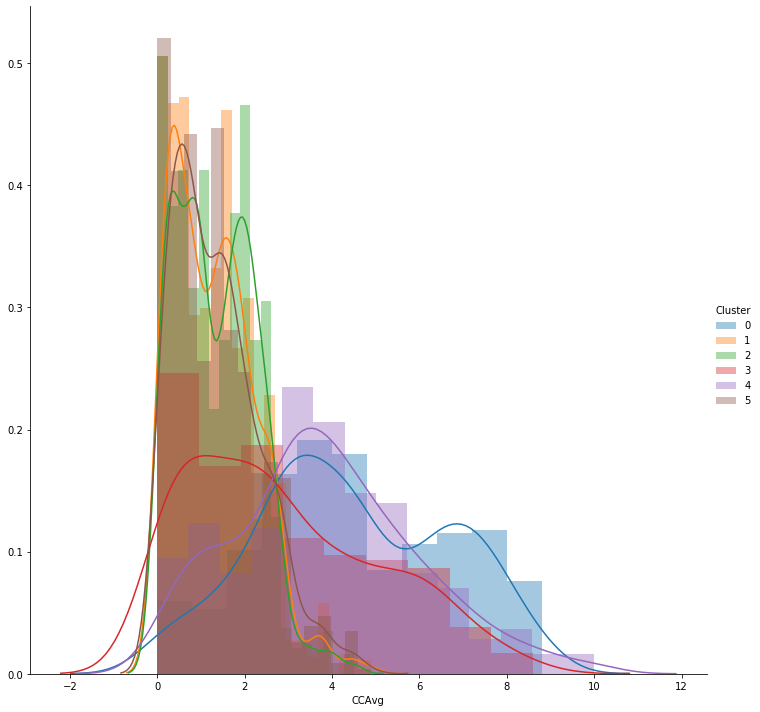

In [23]:
#Visualizing the CCAvg feature with with hue set to clusters. This way we can see the relation between clusters and this feature
sns.FacetGrid(data, hue='Cluster', size=10) \
   .map(sns.distplot, "CCAvg") \
   .add_legend();
plt.show();

#### <u>Observation</u>:Similar to the previous plot, we can see that  people in cluster 1,2 and 5 are distributes at lower CCAvg levels. People in cluster 0 and 4 mostly belong to comparatively higher values of CCAvg, even though they are also distributed to some extent, at lower values. Whereas poeple in cluster 3 are distributed throughout the data and they can be found at all income levels, but they are distributed more at lower values

In [34]:
#the stats for orignal data for CCAvg Feature
data["CCAvg"].describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [35]:
#the stats for Cluster 0 for CCAvg Feature
data_cluster_0["CCAvg"].describe()

count    542.000000
mean       4.471162
std        2.197453
min        0.000000
25%        2.900000
50%        4.300000
75%        6.330000
max        8.800000
Name: CCAvg, dtype: float64

#### <u>Observation</u>:From the min, mean and other percentile values, it is quite evident that people in cluster 0 belong to highest values which we observed in the plot as well

In [36]:
#the stats for Cluster 4 for CCAvg Feature
data_cluster_4["CCAvg"].describe()

count    340.000000
mean       3.855118
std        2.103965
min        0.000000
25%        2.575000
50%        3.700000
75%        5.125000
max       10.000000
Name: CCAvg, dtype: float64

#### <u>Observation</u>:From the min, mean and other percentile values, it is quite evident that people in cluster 4 belong to higher values (but lower than cluster 0 values) which we observed in the plot as well

In [39]:
data_cluster_3["CCAvg"].describe()

count    302.000000
mean       2.878974
std        2.176491
min        0.000000
25%        1.000000
50%        2.450000
75%        4.300000
max        8.600000
Name: CCAvg, dtype: float64

#### <u>Observation</u>:From the min, mean and other percentile values, we can conclude that the people in this cluster belong to both higher and lower range of values which we observed in the plot as well

In [41]:
data_cluster_2["CCAvg"].describe()

count    1577.000000
mean        1.348776
std         0.902736
min         0.000000
25%         0.600000
50%         1.300000
75%         2.000000
max         4.500000
Name: CCAvg, dtype: float64

#### <u>Observation</u>:From the min, mean and other percentile values, we can conclude that the people in this cluster belong to lower value ranges which we observed in the plot as well. There are many people that belong to this cluster

<h2><u>Overall Observations from Clusters: </u></h2>

1. In accordance to my findings of EDA, the clustering seems to be on the basis of Income and CCAvg features, with some clusters belonging to lower values of these features, while some clusters belonging to higher values of these features. 
2. One of the cluster i.e. cluster 4, have people that have both high value of Income and CCAvg, most of the people that applied loan came from this cluster.
3. One of the cluster i.e. Cluster 3 is spread throught the whole possible range of these features. Most pepole from this cluster applied for loan previously

## <u>Modelling</u>

#### <u>Note:</u> I'll use the column "Personal Loan" as the binary output that I want to predict i.e. whether the person will apply for loan or not

In [5]:
with open("data_with_cluster.pkl","rb") as f:
    data = pickle.load(f)

In [6]:
#Preparing input and output data
from sklearn.model_selection import train_test_split
#I am dropping the Cluster as it was leading to overfitting models
X = data.drop(['Personal Loan','Cluster'], axis=1) 
y = data["Personal Loan"]

In [7]:
#splitting the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [8]:
print(X_train.shape)
print(X_test.shape)

(3500, 11)
(1500, 11)


In [9]:
print(str.format("No of people that accepted loan in train dataset: {0}",np.count_nonzero(y_train)))
print(str.format("No of people that accepted loan in test dataset: {0}",np.count_nonzero(y_test)))

No of people that accepted loan in train dataset: 336
No of people that accepted loan in test dataset: 144


#### Defining some utility methods that I will use

In [10]:
#Method to perform Perform grid search for a given estimator with given parameters 
from sklearn.model_selection import GridSearchCV
from time import time
def PerformGridSearchCV(estimator,parameters, cv, scoring, X_train, y_train):
    clf = GridSearchCV(estimator = estimator, param_grid = parameters, cv=cv, scoring = scoring, n_jobs = -1, verbose = 1)
    start = time()
    clf.fit(X_train, y_train)
    print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(clf.cv_results_['params'])))
    report(clf.cv_results_)
    #print(clf.cv_results_)
    return clf.cv_results_,clf.best_score_ ,clf.best_estimator_

In [11]:
# Utility function to report best scores
#reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [12]:
#utlity method to return various performance metrics for test dataset
import sklearn.metrics
def CheckTestSetScores(clf, x_train, y_train, x_test, y_test):
    """Returns the auc, confusion matrix for given estimator on test/val set"""
    clf.fit(X=x_train,y= y_train)
    ytest_pred = clf.predict(X = x_test)
    ytest_proba = clf.predict_proba(X = x_test)
    ytrain_pred = clf.predict(X = x_train)
    ytrain_proba= clf.predict_proba(X = x_train)
    acc = sklearn.metrics.accuracy_score(y_test, ytest_pred, normalize=True) * float(100)
    prec = sklearn.metrics.precision_score(y_test, ytest_pred) * float(100)
    recall = sklearn.metrics.recall_score(y_test, ytest_pred) * float(100)
    f1 = sklearn.metrics.f1_score(y_test, ytest_pred) * float(100)
    auc = sklearn.metrics.roc_auc_score(y_test, ytest_proba[:,1]) * float(100)
    log_loss = sklearn.metrics.log_loss(y_test, ytest_pred,normalize=True)
    conf_matrix = sklearn.metrics.confusion_matrix(y_test, ytest_pred)
    feature_importances = clf.feature_importances_
    return acc,prec,recall,f1,auc,log_loss,conf_matrix,feature_importances

### <u>Using Decision Trees or CART</u>

In [13]:
from sklearn.tree import DecisionTreeClassifier

#### <u>Performing Hyperparameter tuning using Grid Search</u>

In [14]:
#Define parameters and DecisionTreeClassifier estimator to be used in GridSearchCV
parameters = {'min_samples_split':[2,4,6,8,10,15,20],'max_depth':[1, 5, 10,20,50, 100]}
clf = DecisionTreeClassifier(class_weight = 'balanced')

In [16]:
#check best params using gridsearch on the basis of auc score
results,best_score,best_estimator = PerformGridSearchCV(clf, parameters, 3, "roc_auc", X_train, y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s


GridSearchCV took 4.59 seconds for 42 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.974 (std: 0.017)
Parameters: {'max_depth': 5, 'min_samples_split': 15}

Model with rank: 2
Mean validation score: 0.974 (std: 0.016)
Parameters: {'max_depth': 5, 'min_samples_split': 20}

Model with rank: 3
Mean validation score: 0.971 (std: 0.014)
Parameters: {'max_depth': 5, 'min_samples_split': 10}

Model with rank: 4
Mean validation score: 0.971 (std: 0.014)
Parameters: {'max_depth': 5, 'min_samples_split': 8}

Model with rank: 5
Mean validation score: 0.970 (std: 0.013)
Parameters: {'max_depth': 10, 'min_samples_split': 20}

Model with rank: 5
Mean validation score: 0.970 (std: 0.013)
Parameters: {'max_depth': 20, 'min_samples_split': 20}

Model with rank: 5
Mean validation score: 0.970 (std: 0.013)
Parameters: {'max_depth': 50, 'min_samples_split': 20}

Model with rank: 5
Mean validation score: 0.970 (std: 0.013)
Parameters: {'max_depth': 100, 'min_samples_split': 20}



[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:    4.5s finished


In [17]:
df_results = pd.DataFrame(results)

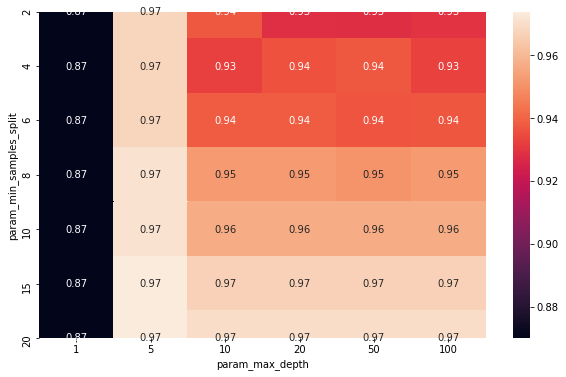

In [18]:
#Visualizing score change with two hyperparameters using a heatmap for train data
import seaborn as sns
plt.figure(figsize = (10, 6))
pivot = df_results.pivot(index='param_min_samples_split', columns='param_max_depth', values='mean_test_score')
ax = sns.heatmap(pivot,annot=True)
plt.show()

In [19]:
#print the best hyper-parameters
print(best_estimator.get_params()["min_samples_split"])
print(best_estimator.get_params()["max_depth"])

15
5


#### <u>Checking the model performance of test dataset using the tuned hyperparameters</u>

In [20]:
#Now get the model performance metrices on test set with tuned hyperparameters
optimal_min_samples_split = best_estimator.get_params()["min_samples_split"]
optimal_max_depth = best_estimator.get_params()["max_depth"]
dtc = DecisionTreeClassifier(class_weight = 'balanced', max_depth = optimal_max_depth, min_samples_split = optimal_min_samples_split)
acc,prec,recall,f1,auc,log_loss,conf_matrix,feature_importances = CheckTestSetScores(dtc, X_train, y_train,X_test, y_test)

Accuracy score for test set is 96.8
Precision score for test set is 76.08695652173914
Recall score for test set is 97.22222222222221
F1 score for test set is 85.3658536585366
AUC score for test set is 99.02209316617503
Log loss for test set is 1.1052642994950952
Confusion matrix for test set is:
[[1312   44]
 [   4  140]]


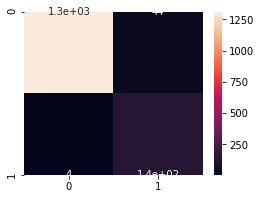

True Negative with optimal hyperparameters is 1312
False Positive with optimal hyperparameters is 44
True Positive with optimal hyperparameters is 140
False Negative with optimal hyperparameters is 4


In [21]:
print(str.format("Accuracy score for test set is {0}",acc))
print(str.format("Precision score for test set is {0}",prec))
print(str.format("Recall score for test set is {0}",recall))
print(str.format("F1 score for test set is {0}",f1))
print(str.format("AUC score for test set is {0}",auc))
print(str.format("Log loss for test set is {0}",log_loss))
#print confusion matrix for test set
print("Confusion matrix for test set is:")
print(conf_matrix)
#plotting confusion matrix on heatmap
import seaborn as sns
plt.figure(figsize = (4, 3))
sns.heatmap(conf_matrix, annot=True)
plt.show()
tn, fp, fn, tp = conf_matrix.ravel()
print('True Negative with optimal hyperparameters is %d' % (tn))
print('False Positive with optimal hyperparameters is %d' % (fp))
print('True Positive with optimal hyperparameters is %d' % (tp))
print('False Negative with optimal hyperparameters is %d' % (fn))

In [22]:
#Printing most important features that decide if a person takes loan
pos_class_FI_sorted = feature_importances.argsort()[::-1]
print(np.take(X.columns, pos_class_FI_sorted))

Index(['Income (in K/month)', 'Family members', 'CCAvg', 'Education',
       'Experience (in years)', 'Online', 'CreditCard', 'CD Account',
       'Securities Account', 'Mortgage', 'Age (in years)'],
      dtype='object')


### Predicting new customers that have a high probability of taking personal loan

In [23]:
with open("data_with_cluster.pkl","rb") as f:
    data = pickle.load(f)

In [24]:
#I will now delete the rows where customers previously took loan as there is no use of predicting them
data.drop(data[data["Personal Loan"] == 1].index, inplace = True)

In [25]:
X = data.drop(['Personal Loan','Cluster'], axis=1)

In [26]:
X.shape

(4520, 11)

In [27]:
#Now predicting prababilities for whole dataset that is remaining after dropping the rows above
y_proba = dtc.predict_proba(X = X)

In [28]:
cust_with_90pc_chance = []
cust_with_80pc_chance = []
cust_with_70pc_chance = []
for row in range(0,X.shape[0]):
    if y_proba[row][1] > 0.9:
        cust_with_90pc_chance.append(data.iloc[row])
    if y_proba[row][1] > 0.8:
        cust_with_80pc_chance.append(data.iloc[row])
    if y_proba[row][1] > 0.7:
        cust_with_70pc_chance.append(data.iloc[row])

In [29]:
print(str.format("Customers with more than 90% chance of taking a loan is {0}",len(cust_with_90pc_chance)))
print(str.format("Customers with more than 80% chance of taking a loan is {0}",len(cust_with_80pc_chance)))
print(str.format("Customers with more than 70% chance of taking a loan is {0}",len(cust_with_70pc_chance)))

Customers with more than 90% chance of taking a loan is 25
Customers with more than 80% chance of taking a loan is 86
Customers with more than 70% chance of taking a loan is 135


### <u>Using Random Forest</u>

In [27]:
from sklearn.ensemble import RandomForestClassifier

#### <u>Performing Hyperparameter tuning using Grid Search</u>

In [28]:
#Define parameters and RandomForestClassifier estimator to be used in GridSearchCV
parameters = {'n_estimators':[5, 10, 20, 30, 50, 100, 200],'max_depth':[1,5,10,15,20,50,80,100]}
clf = RandomForestClassifier(class_weight = 'balanced', n_jobs = -1, max_features = None)

In [14]:
#check best params using gridsearch on the basis of auc score
results,best_score,best_estimator = PerformGridSearchCV(clf, parameters, 3, "roc_auc", X_train, y_train)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   10.1s finished


GridSearchCV took 10.50 seconds for 56 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.997 (std: 0.000)
Parameters: {'max_depth': 10, 'n_estimators': 200}

Model with rank: 2
Mean validation score: 0.997 (std: 0.000)
Parameters: {'max_depth': 100, 'n_estimators': 200}

Model with rank: 3
Mean validation score: 0.997 (std: 0.000)
Parameters: {'max_depth': 20, 'n_estimators': 100}

Model with rank: 4
Mean validation score: 0.997 (std: 0.000)
Parameters: {'max_depth': 50, 'n_estimators': 200}

Model with rank: 5
Mean validation score: 0.996 (std: 0.000)
Parameters: {'max_depth': 5, 'n_estimators': 200}



In [16]:
df_results = pd.DataFrame(results)

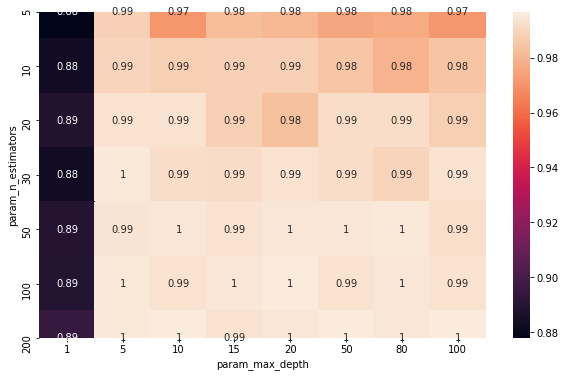

In [17]:
#Visualizing score change with two hyperparameters using a heatmap for train data
import seaborn as sns
plt.figure(figsize = (10, 6))
pivot = df_results.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_score')
ax = sns.heatmap(pivot,annot=True)
plt.show()

In [18]:
#print the best hyper-parameters
print(best_estimator.get_params()["n_estimators"])
print(best_estimator.get_params()["max_depth"])

200
10


#### <u>Checking the model performance of test dataset using the tuned hyperparameters</u>
#### <u>Note:</u> As I was not getting a goof performance with the best parameters which might be happening due to overfitting, so I tried a different combination of parameters by looking at the heat map. And by using the below given parameters I got an improved performance

In [35]:
optimal_n_estimators = 20
optimal_max_depth = 5
rfc = RandomForestClassifier(class_weight = 'balanced',max_features = None, max_depth = optimal_max_depth, n_estimators = optimal_n_estimators, n_jobs = -1)
acc,prec,recall,f1,auc,log_loss,conf_matrix,feature_importances = CheckTestSetScores(rfc, X_train, y_train,X_test, y_test)

Accuracy score for test set is 97.26666666666667
Precision score for test set is 78.77094972067039
Recall score for test set is 97.91666666666666
F1 score for test set is 87.30650154798761
AUC score for test set is 99.79822189446084
Log loss for test set is 0.9440801445957911
Confusion matrix for test set is:
[[1318   38]
 [   3  141]]


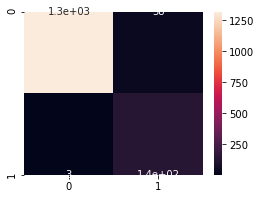

True Negative with optimal hyperparameters is 1318
False Positive with optimal hyperparameters is 38
True Positive with optimal hyperparameters is 141
False Negative with optimal hyperparameters is 3


In [36]:
print(str.format("Accuracy score for test set is {0}",acc))
print(str.format("Precision score for test set is {0}",prec))
print(str.format("Recall score for test set is {0}",recall))
print(str.format("F1 score for test set is {0}",f1))
print(str.format("AUC score for test set is {0}",auc))
print(str.format("Log loss for test set is {0}",log_loss))
#print confusion matrix for test set
print("Confusion matrix for test set is:")
print(conf_matrix)
#plotting confusion matrix on heatmap
import seaborn as sns
plt.figure(figsize = (4, 3))
sns.heatmap(conf_matrix, annot=True)
plt.show()
tn, fp, fn, tp = conf_matrix.ravel()
print('True Negative with optimal hyperparameters is %d' % (tn))
print('False Positive with optimal hyperparameters is %d' % (fp))
print('True Positive with optimal hyperparameters is %d' % (tp))
print('False Negative with optimal hyperparameters is %d' % (fn))

In [37]:
#Printing most important features that decide if a person takes loan
pos_class_FI_sorted = feature_importances.argsort()[::-1]
print(np.take(X_train.columns, pos_class_FI_sorted))

Index(['Income (in K/month)', 'Family members', 'CCAvg', 'Education',
       'CD Account', 'Experience (in years)', 'Age (in years)', 'Mortgage',
       'Securities Account', 'Online', 'CreditCard'],
      dtype='object')


## Predicting new customers that have a high probability of taking personal loan

In [43]:
#Now predicting prababilities for whole dataset
y_proba = rfc.predict_proba(X = X)

In [44]:
cust_with_90pc_chance = []
cust_with_80pc_chance = []
cust_with_70pc_chance = []
for row in range(0,X.shape[0]):
    if y_proba[row][1] > 0.9:
        cust_with_90pc_chance.append(data.iloc[row])
    if y_proba[row][1] > 0.8:
        cust_with_80pc_chance.append(data.iloc[row])
    if y_proba[row][1] > 0.7:
        cust_with_70pc_chance.append(data.iloc[row])

In [45]:
print(str.format("Customers with more than 90% chance of taking a loan is {0}",len(cust_with_90pc_chance)))
print(str.format("Customers with more than 80% chance of taking a loan is {0}",len(cust_with_80pc_chance)))
print(str.format("Customers with more than 70% chance of taking a loan is {0}",len(cust_with_70pc_chance)))

Customers with more than 90% chance of taking a loan is 9
Customers with more than 80% chance of taking a loan is 22
Customers with more than 70% chance of taking a loan is 44


<h2><u>Overall Summary from models: </u></h2>
<b>1. With CART I was able to identify 25 new customers that have more than 90% chance of taking loan and overall 135 new customers that have more than 70% chances of taking loan.<br>
2. With RF I was able to identify 9 new customers that have more than 90% chance of taking loan and overall 44 new customers that have more than 70% chances of taking loan.<br>
3. The performance of CART seems to be much better than RF. The reason might be the total number of data points. For RF ideally a large amount of data is required for a good performance but in our problem we only have 5000 data points.</b>